In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fake.csv to Fake (1).csv
Saving True.csv to True.csv


In [ ]:
import pandas as pd

# Load the CSV files
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

# Add labels: Fake = 0, Real = 1
fake["label"] = 0
real["label"] = 1

# Combine datasets
df = pd.concat([fake, real])
df = df[["text", "label"]].dropna()
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data

# View dataset info
print(df.head())
print(df["label"].value_counts())



                                                text  label
0  Donald Trump is again under fire from allegati...      0
1  The outspoken liberal comedian posed for a pho...      0
2  JERUSALEM (Reuters) - Israel s Supreme Court r...      1
3  ANKARA (Reuters) - Turkish President Tayyip Er...      1
4  MOGADISHU (Reuters) - Fighting between the mil...      1
label
0    23481
1    21417
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [23]:
# After training a better model
import pickle

with open("logistic_model.pkl", "wb") as f:
    pickle.dump(new_model, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(new_vectorizer, f)


NameError: name 'new_model' is not defined

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9857461024498887
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4748
           1       0.98      0.99      0.98      4232

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
import joblib

joblib.dump(model, "logistic_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
from google.colab import files

files.download("logistic_model.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install wordcloud


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


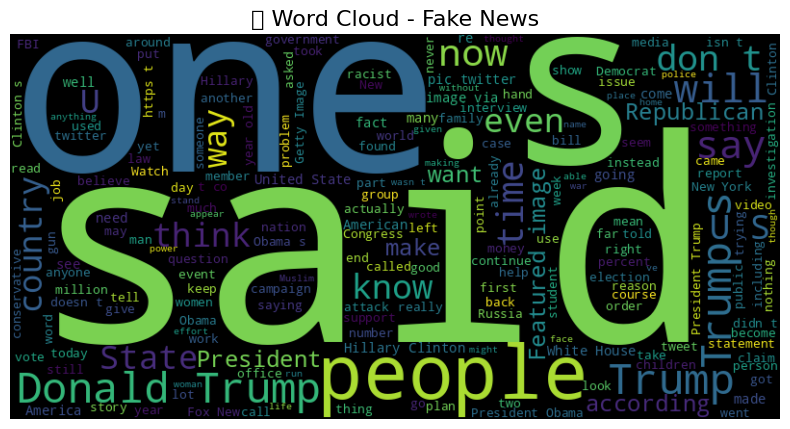

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


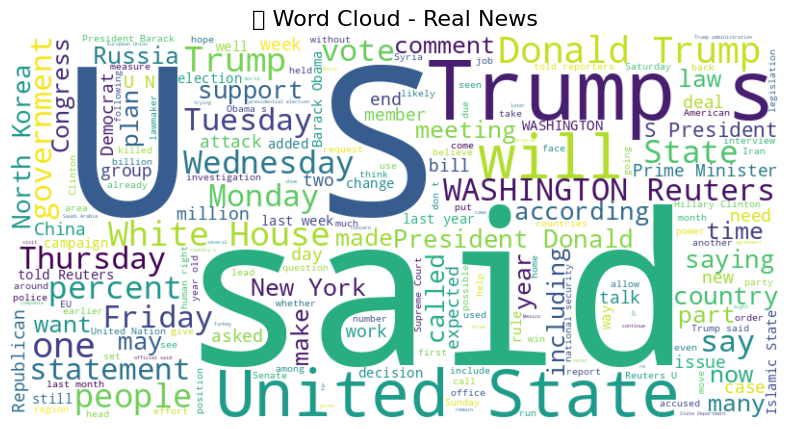

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Fake News
fake_text = " ".join(df[df['label'] == 0]['text'].tolist())
wordcloud_fake = WordCloud(width=800, height=400, background_color='black').generate(fake_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.title("❌ Word Cloud - Fake News", fontsize=16)
plt.show()

# WordCloud for Real News
real_text = " ".join(df[df['label'] == 1]['text'].tolist())
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.title("✅ Word Cloud - Real News", fontsize=16)
plt.show()


In [ ]:
!pip install shap


In [ ]:
from transformers import pipeline
explainer = shap.Explainer(pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english"))
shap_values = explainer(["This is a fake news article."])
shap.plots.text(shap_values[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
import shap
from transformers import pipeline

# Sentiment analysis model, works fine for demonstration
classifier = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

# SHAP Explainer
explainer = shap.Explainer(classifier)

# Sample news text
sample_text = ["The government is hiding the truth from the public."]
shap_values = explainer(sample_text)

# Text-based explanation
shap.plots.text(shap_values[0])


Device set to use cpu


  0%|          | 0/132 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:15, 15.32s/it]               
